In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold

In [37]:
df = pd.read_csv('739to4000_with_tags,KL_divergence,FinRatios,features_lessthan70%_selected.csv')
df.head()

,Unnamed: 0,adsh,fraud,ddate,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,...,sum_of_first_digits,total_deviation,CurrentRatio,DebtToEquityRatio,ProfitMargin,ReceivableTurnover,CollectionRatio,AQI,DEPI,TATA
0,0,0000002178-18-000009,0.0,20161231.0,106756000.0,7.875000e+07,6504000.0,1.114280e+08,2.210870e+08,2.163510e+09,...,944,0.002008,5.928878,0.539227,0.229387,26.298456,13.879142,0.000000,0.316076,0.559690
1,1,0000002488-18-000042,0.0,20161231.0,126000000.0,2.010000e+09,90000000.0,3.825000e+09,9.210000e+08,6.611000e+09,...,1162,0.003766,5.913464,1.464384,0.332087,78.555556,4.646393,0.036223,0.261277,0.122158
2,2,0000002969-18-000014,0.0,20161231.0,-57400000.0,5.735000e+08,525400000.0,1.040000e+07,2.061000e+08,1.587700e+09,...,596,0.008125,60.201923,0.003057,0.156600,-32.796167,-11.129349,0.000000,0.320778,-0.217035
3,3,0000003499-18-000006,0.0,20161231.0,182581000.0,8.456940e+08,130820000.0,1.110608e+09,1.655981e+09,3.176400e+08,...,660,0.023214,2.267681,0.822055,0.270854,2.385971,152.977541,0.000000,0.367267,-0.002388
4,4,0000003545-18-000021,0.0,20161231.0,7177000.0,-6.183000e+06,-16890000.0,-4.823000e+06,3.916000e+06,3.149000e+06,...,400,0.034988,-0.191167,2.353128,0.903325,4.538526,80.422589,0.000000,0.370623,6.116482


In [38]:
target = df.fraud

In [39]:
fraud = df[['adsh','fraud']]
df = df.set_index('adsh')
fraud = fraud.set_index('adsh')

In [40]:
df = df.drop(['Unnamed: 0','ddate','fraud'], axis=1)
df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,Sales,...,sum_of_first_digits,total_deviation,CurrentRatio,DebtToEquityRatio,ProfitMargin,ReceivableTurnover,CollectionRatio,AQI,DEPI,TATA
adsh,,,,,,,,,,,,,,,,,,,,,
0000002178-18-000009,106756000.0,7.875000e+07,6504000.0,1.114280e+08,2.210870e+08,2.163510e+09,0.0,4.751370e+08,4.700000e+06,2.807518e+09,...,944,0.002008,5.928878,0.539227,0.229387,26.298456,13.879142,0.000000,0.316076,0.559690
0000002488-18-000042,126000000.0,2.010000e+09,90000000.0,3.825000e+09,9.210000e+08,6.611000e+09,948000000.0,2.048300e+10,1.559000e+09,9.898000e+09,...,1162,0.003766,5.913464,1.464384,0.332087,78.555556,4.646393,0.036223,0.261277,0.122158
0000002969-18-000014,-57400000.0,5.735000e+08,525400000.0,1.040000e+07,2.061000e+08,1.587700e+09,0.0,1.100000e+08,-7.588000e+08,1.882500e+09,...,596,0.008125,60.201923,0.003057,0.156600,-32.796167,-11.129349,0.000000,0.320778,-0.217035
0000003499-18-000006,182581000.0,8.456940e+08,130820000.0,1.110608e+09,1.655981e+09,3.176400e+08,0.0,1.490230e+09,0.000000e+00,4.356330e+08,...,660,0.023214,2.267681,0.822055,0.270854,2.385971,152.977541,0.000000,0.367267,-0.002388
0000003545-18-000021,7177000.0,-6.183000e+06,-16890000.0,-4.823000e+06,3.916000e+06,3.149000e+06,0.0,-7.200000e+04,2.194500e+07,3.257300e+07,...,400,0.034988,-0.191167,2.353128,0.903325,4.538526,80.422589,0.000000,0.370623,6.116482


In [41]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), index = df.index,columns=df.columns)
scaled_df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,Sales,...,sum_of_first_digits,total_deviation,CurrentRatio,DebtToEquityRatio,ProfitMargin,ReceivableTurnover,CollectionRatio,AQI,DEPI,TATA
adsh,,,,,,,,,,,,,,,,,,,,,
0000002178-18-000009,-0.049149,-0.047866,-0.188882,-0.115455,-0.133843,-0.093800,-0.15116,-0.077214,-0.066630,-0.093298,...,-0.002642,-0.433615,-0.013285,-0.013332,0.027361,-0.015921,-0.020880,-0.225344,0.271118,0.043936
0000002488-18-000042,-0.049063,0.039445,-0.155622,0.110438,-0.053649,0.001734,-0.09378,-0.030408,-0.040274,0.156840,...,0.351155,-0.370117,-0.013285,-0.013332,0.027402,0.026730,-0.020881,-0.124785,0.171077,-0.007698
0000002969-18-000014,-0.049886,-0.025498,0.017818,-0.121601,-0.135561,-0.106169,-0.15116,-0.078068,-0.079576,-0.125931,...,-0.567419,-0.212703,-0.013285,-0.013332,0.027331,-0.064152,-0.020882,-0.225344,0.279702,-0.047727
0000003499-18-000006,-0.048809,-0.013192,-0.139362,-0.054676,0.030564,-0.133451,-0.15116,-0.074839,-0.066710,-0.176973,...,-0.463552,0.332228,-0.013285,-0.013332,0.027377,-0.035438,-0.020870,-0.225344,0.364571,-0.022396
0000003545-18-000021,-0.049596,-0.051705,-0.198201,-0.122527,-0.158726,-0.140206,-0.15116,-0.078325,-0.066337,-0.191193,...,-0.885512,0.757414,-0.013285,-0.013332,0.027631,-0.033681,-0.020875,-0.225344,0.370698,0.699700


In [42]:
scaled_df = scaled_df.rename(index=str, columns={"sum_of_first_digits": "LengthOfFinStmt", "total_deviation": "DeviationFromBenford"})

In [43]:
# scaled = scaled_df.join(fraud)
# scaled.head()

In [44]:
# scaled.to_csv('scaled_df_on_70%features.csv')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target)

In [46]:
# TPOT run 2/5/19 at 9:00pm:
# Best pipeline: GradientBoostingClassifier
#     (input_matrix, learning_rate=0.1, max_depth=10, max_features=0.35000000000000003, 
#      min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0)


In [47]:
# adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=10,
                                    max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=10, 
                                     n_estimators=100, subsample=1)

In [48]:
# adaboost_clf.fit(X_train, y_train)

In [49]:
gbt_clf.fit(X_train.as_matrix(), y_train.as_matrix())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=0.35000000000000003, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [50]:
# adaboost_train_preds = adaboost_clf.predict(X_train)
# adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [51]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
# display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
# display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


Training Metrics

Model: Gradient Boosted Trees
Accuracy: 1.0
F1-Score: 1.0

Testing Metrics

Model: Gradient Boosted Trees
Accuracy: 0.9634986225895317
F1-Score: 0.8515406162464986


In [52]:
# adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
# adaboost_confusion_matrix

In [53]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[1247,   11],
       [  42,  152]])

In [54]:
# adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
# print(adaboost_classification_report)

In [55]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1258
         1.0       0.93      0.78      0.85       194

   micro avg       0.96      0.96      0.96      1452
   macro avg       0.95      0.89      0.92      1452
weighted avg       0.96      0.96      0.96      1452



In [56]:
# print('Mean Adaboost Cross-Val Score (k=5):')
# print(cross_val_score(adaboost_clf, scaled_df, target, cv=5).mean())

In [57]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_df, target, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9178761350822008


In [58]:
gbt_clf.feature_importances_

array([0.04487374, 0.0312864 , 0.05582253, 0.06220545, 0.07091734,
       0.1032968 , 0.02784987, 0.05830701, 0.03377111, 0.02970607,
       0.0518106 , 0.16167033, 0.09505237, 0.00306387, 0.00028934,
       0.01208051, 0.00964139, 0.01199061, 0.03475324, 0.06338221,
       0.03822923])

In [59]:
len(gbt_clf.feature_importances_)

21

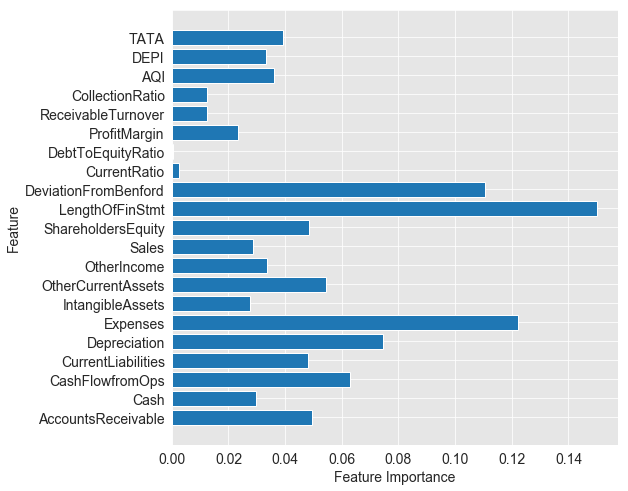

In [64]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), gbt_clf.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.rcParams.update({'font.size': 14})

plot_feature_importances(gbt_clf)

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test, gbt_clf_test_preds)

0.8515406162464986

AUC: 0.9912682543064593


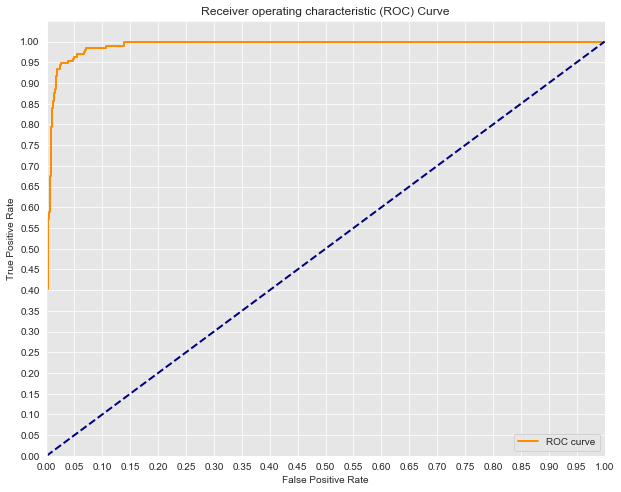

In [62]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
#Probability scores for test set
y_score = gbt_clf.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.rcParams.update({'font.size': 12})
plt.show()